In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_excel('Online retail.xlsx')
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [4]:
df.shape

(7500, 1)

In [6]:
df['Transaction']= df.iloc[:,0].apply(lambda x: x.split(','))   # splitting column into list of items per transaction
df= df[['Transaction']]

In [43]:
df.isnull().sum()  # no missing values

Transaction          0
Transaction_Tuple    0
dtype: int64

In [7]:
df.duplicated().sum()  # duplicated identified

2325

In [8]:
df= df.drop_duplicates().reset_index(drop=True)   # duplicates removed
df.duplicated().sum()

0

In [9]:
df.head()

,Transaction
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, milk, energy bar, whole wheat ..."
4,[low fat yogurt]


In [41]:
df.dtypes

Transaction          object
Transaction_Tuple    object
dtype: object

In [11]:
te= TransactionEncoder()   # converting transaction data into format suitable for Apriori
te_ary= te.fit(df['Transaction']).transform(df['Transaction'])
df_encoded= pd.DataFrame(te_ary,columns=te.columns_)

In [12]:
# Apriori algorith applying
frequent_itemsets= apriori(df_encoded,min_support=0.05,use_colnames=True)

In [13]:
# association rules generation 
rules= association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.205217,0.299710,0.073237,0.356874,1.190730,1.0,0.011731,1.088884,0.201538,0.169651,0.081629,0.300616
1,(eggs),(mineral water),0.208116,0.299710,0.070145,0.337047,1.124578,1.0,0.007770,1.056320,0.139891,0.160265,0.053317,0.285545
2,(frozen vegetables),(mineral water),0.129855,0.299710,0.050435,0.388393,1.295895,1.0,0.011516,1.144999,0.262407,0.133028,0.126637,0.278336
3,(ground beef),(mineral water),0.135845,0.299710,0.058744,0.432432,1.442835,1.0,0.018030,1.233844,0.355168,0.155897,0.189525,0.314218
4,(ground beef),(spaghetti),0.135845,0.229565,0.055845,0.411095,1.790756,1.0,0.024660,1.308250,0.510993,0.180400,0.235620,0.327181


In [14]:
strong_rules= rules[rules['lift']>=1.2]     # strong associations
print(strong_rules.sort_values(by='lift',ascending=False).head(10))

           antecedents      consequents  antecedent support  \
4        (ground beef)      (spaghetti)            0.135845   
3        (ground beef)  (mineral water)            0.135845   
5               (milk)  (mineral water)            0.170048   
2  (frozen vegetables)  (mineral water)            0.129855   
6          (spaghetti)  (mineral water)            0.229565   

   consequent support   support  confidence      lift  representativity  \
4            0.229565  0.055845    0.411095  1.790756               1.0   
3            0.299710  0.058744    0.432432  1.442835               1.0   
5            0.299710  0.067826    0.398864  1.330831               1.0   
2            0.299710  0.050435    0.388393  1.295895               1.0   
6            0.299710  0.085024    0.370370  1.235762               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
4  0.024660    1.308250       0.510993  0.180400   0.235620    0.327181  
3  0.018030    1.23384

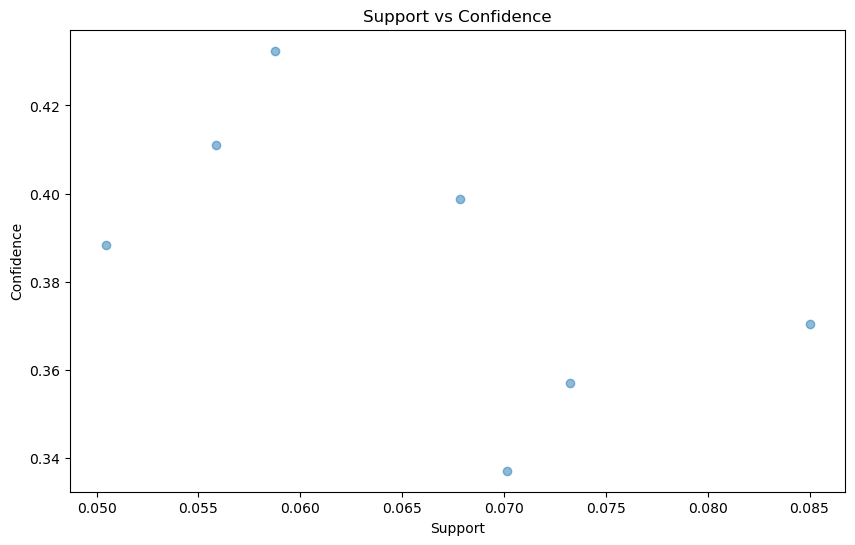

In [45]:
# Visualization of Association Rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

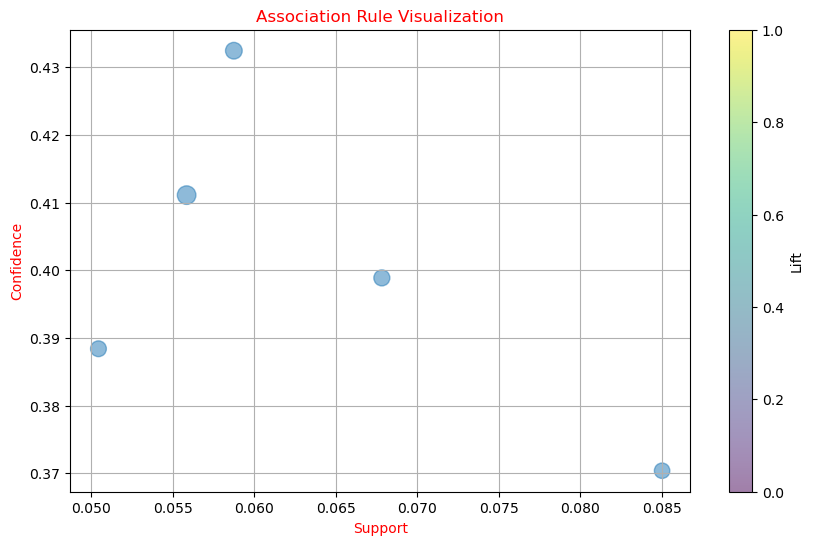

In [16]:
# Visualization Association strong rules using scatter plot
plt.figure(figsize=(10,6))
plt.scatter(strong_rules['support'],strong_rules['confidence'],s=strong_rules['lift']*100,alpha= 0.5)
plt.xlabel('Support',color='red')
plt.ylabel('Confidence',color='red')
plt.title('Association Rule Visualization',color='red')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

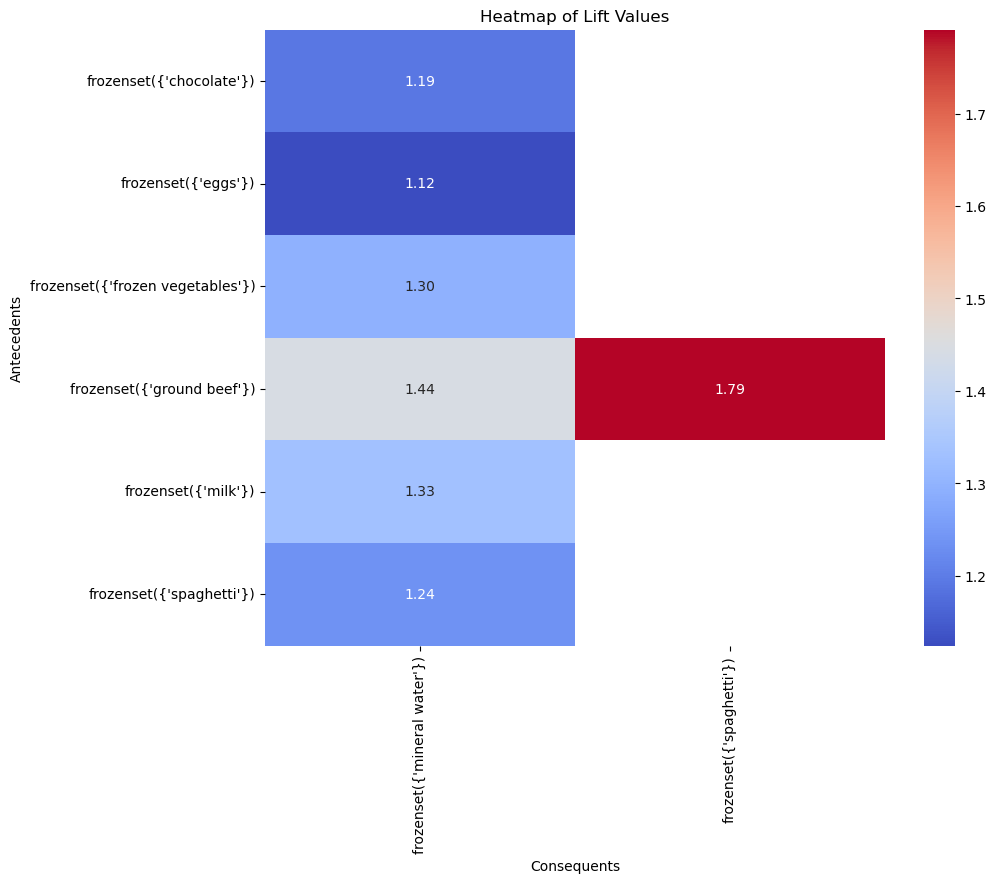

In [47]:
# Heatmap of Lift Values
plt.figure(figsize=(10, 8))
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Lift Values")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Interview Questions:

1.	What is lift and why is it important in Association rules?
  - Lift measures how much more likely two items are to be purchased together compared to if they were independent. It is calculated as:
    Lift= Confidence/Expected confidence
    - Lift>1: Items are positivelly correlated
    - Lift=1: No association
    - Lift<1: Items are negatively correlated.  
    Lift is crucial in association rule mining because it helps identify meaningful relationships beyond random co-occurances, making it more reliable than confidence alone.

2.	What is support and Confidence. How do you calculate them?
  -  Support measures how frequently an itemset appears in the dataset. It is calculated as
      Support= Transactions containing the itemset/Total transactions
   -  Confidence measures how often items in the consequent appear in transactions that contain the antecedent. It is calculated as:
   -  Confidence= Support of (Antecedent U Consequent)/Support of Antecedent  
     Support helps filter out rare itemsets, while confidence evaluates the strength of an association.
  

3.	What are some limitations or challenges of Association rules mining?

    Limitations of Association Rule Mining  
   - Computational Complexity - Generating frequent itemsets can be slow for large datasets, requiring significant memory and processing power.
   - Too Many Rules- It can produce an overwhelming number of rules, making it hard to find meaningful insights.
   - Low Interpretability- Some discovered rules may be trivial, redundant,or lack real world significance.
   - Rare item problem- Items with low support may be ignored, even if they have strong associations.
   - Choosing Thresholds- Setting appropriate support, confidence and lift values requires domain knowledge and experimentation. 